In [26]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
df = pd.read_excel("dataset.xlsx")
df.replace("-", np.nan, inplace=True)


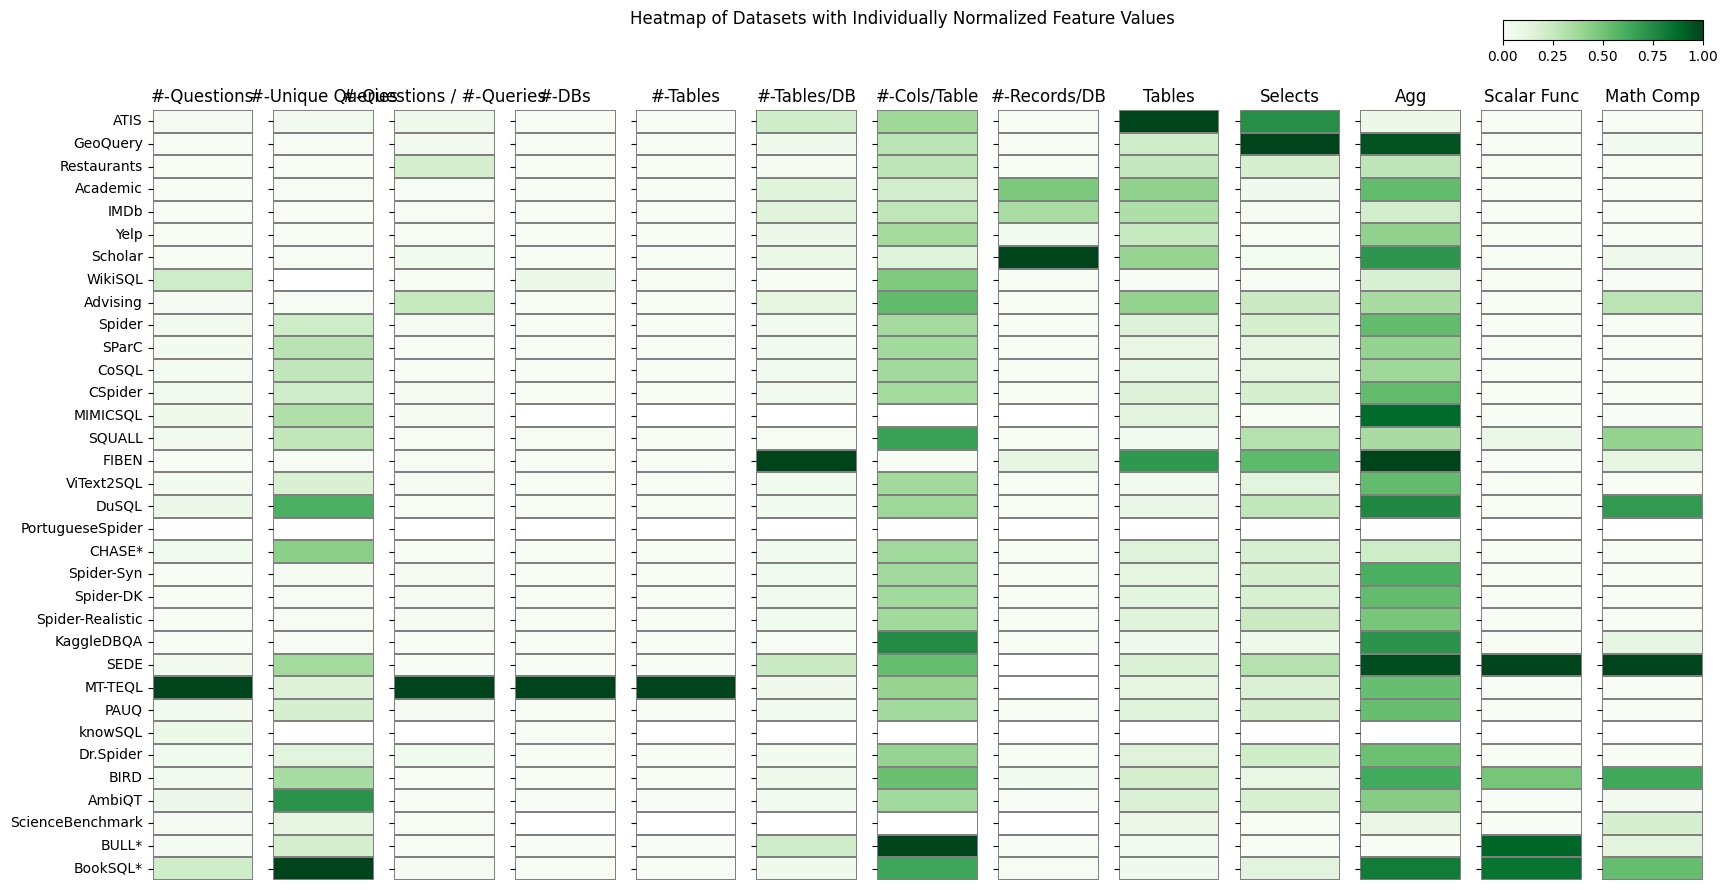

In [96]:
fig, axes = plt.subplots(nrows=1, ncols=len(df.columns) - 1, figsize=(20, 10), sharey=True)
for idx, col in enumerate(df.columns[1:]):
    # Normalize the column
    col_data = df[[col]].copy()
    col_data = (col_data - col_data.min(skipna=True)) / (col_data.max(skipna=True) - col_data.min(skipna=True))
    col_data = np.log(col_data + 1)
    # col_data = (col_data - col_data.mean(skipna=True)) / col_data.std(skipna=True)

    # Create a mask for NaN values
    mask = col_data.isna()

    # Set the index to 'Dataset'
    col_data.set_index(df['Dataset'], inplace=True)
    mask.set_index(df['Dataset'], inplace=True)
    
    # if idx == len(df.columns[1:]) - 1:
    #     sns.heatmap(col_data, mask=mask, annot=False, cmap='Greens', ax=axes[idx])
    # else:
    #     sns.heatmap(col_data, mask=mask, annot=False, cbar=False, cmap='Greens', ax=axes[idx])
    sns.heatmap(col_data, mask=mask, annot=False, cbar=False, cmap='Greens', ax=axes[idx], linewidths=0.2, linecolor='grey')

    axes[idx].set_title(col)
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel('')
    axes[idx].set_xticks([])

cbar_ax = fig.add_axes([0.8, 0.95, 0.1, 0.02])  # [left, bottom, width, height]
norm = plt.Normalize(vmin=0, vmax=1)
sm = plt.cm.ScalarMappable(cmap="Greens", norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal')
# cbar.ax.set_xticklabels([])
# cbar.ax.xaxis.set_ticks_position('none')


plt.suptitle('Heatmap of Datasets with Individually Normalized Feature Values')
plt.show()